In [1]:
import pandas as pd

# Summarizing, Aggregating & Grouping
Knowing how to use pandas aggregation and grouping functions lets us look at our data in a different way and quickly find more specific insights.

In [2]:
wine = pd.read_csv('data/wine_reviews/winemag-data_first150k.csv', index_col=0)

Answer to exercise from notebook 1:


`scrambled_wine[['points', 'region_1']].iloc[:5] 
`

## Initial quick analysis using pandas
Pandas has multiple built-in functions that make it easy to quickly see what's in your dataframe. 
You can build them with the selecting tools you used before.

Here, we will select a column, and then see how pandas lets us quickly analyse it.

To quickly see which columns our wine dataset has, we can use the .columns attribute.

In [3]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Let's select price.

In [6]:
wine['price'].head()

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

We can quickly see some metrics of the price, using some built-in aggergating functions in pandas.

In [7]:
print('Average wine price: ', wine['price'].mean())
print('Min wine price: ', wine['price'].min())
print('Median wine price: ', wine['price'].median())
print('Max wine price: ', wine['price'].max())

Average wine price:  33.13148249353299
Min wine price:  4.0
Median wine price:  24.0
Max wine price:  2300.0


And some more advanced metrics..

In [8]:
wine['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

What if we want to see this list in the opposite order?

In [9]:
wine['country'].value_counts().sort_values(ascending=True)

US-France                     1
Montenegro                    2
Japan                         2
Tunisia                       2
Albania                       2
China                         3
Egypt                         3
Slovakia                      3
South Korea                   4
Bosnia and Herzegovina        4
Switzerland                   4
Ukraine                       5
Czech Republic                6
Lithuania                     8
India                         8
England                       9
Luxembourg                    9
Morocco                      12
Serbia                       14
Macedonia                    16
Brazil                       25
Cyprus                       31
Lebanon                      37
Georgia                      43
Turkey                       52
Mexico                       63
Moldova                      71
Bulgaria                     77
Croatia                      89
Uruguay                      92
Slovenia                     94
Romania 

Both of these lists are too long. What if we only want to see the top 10 countries?
We can string together the other selectors we learned before!

Can you think of another way to get the top 10 rows?

In [10]:
wine['country'].value_counts().iloc[:10]

US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64

What if we just want to know how many countries are on the list?

In [11]:
# Number of non-null unique values
wine['country'].nunique()

48

And if we want a list of them? 
(This isn't a pandas thing, but is still super useful:)

In [12]:
# Gives all unique values
set(wine['country'])

{nan,
 'Ukraine',
 'Luxembourg',
 'Austria',
 'Brazil',
 'Germany',
 'US-France',
 'Romania',
 'Lithuania',
 'Morocco',
 'Uruguay',
 'Slovakia',
 'Argentina',
 'Croatia',
 'Tunisia',
 'Slovenia',
 'Israel',
 'Macedonia',
 'Egypt',
 'Cyprus',
 'India',
 'US',
 'Greece',
 'Japan',
 'Mexico',
 'England',
 'France',
 'Moldova',
 'Serbia',
 'New Zealand',
 'South Africa',
 'South Korea',
 'Georgia',
 'Portugal',
 'Spain',
 'Turkey',
 'Bulgaria',
 'Canada',
 'Switzerland',
 'Hungary',
 'Albania',
 'Bosnia and Herzegovina',
 'Czech Republic',
 'Chile',
 'Australia',
 'Lebanon',
 'China',
 'Italy',
 'Montenegro'}

You can look [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) for a list of all the built-in pandas stats.

One of the most powerful built-in summary tools for pandas is `df.describe()`. This quickly calculates some of these stats for the numeric columns in the df.

In [13]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


**Question**: Why are only 2 of the columns included?

### Conditional Selections 
We can use conditional selections to narrow our analysis even further.

DON'T FORGET - to make things easier, we can save selections we plan to use often as their own variables.

In [14]:
us = wine[wine['country']=='US']
france = wine[wine['country']=='France']

In [15]:
print('Mean American wine price: $', round(us['price'].mean(),2))
print('Mean French wine price: $', round(france['price'].mean(),2))
print('Mean overall wine price is: $', round(wine['price'].mean(),2))

Mean American wine price: $ 33.65
Mean French wine price: $ 45.62
Mean overall wine price is: $ 33.13


We can then use these to calculate more targeted metrics.

In [16]:
print('French wine is ${} more expensive on average'.format(round(france['price'].mean() - wine['price'].mean(),2)))

French wine is $12.49 more expensive on average


#### More advanced conditionals: Using masks
When you want to filter on >1 criteria, it can be easier to use a mask.

How many wines from North America do we have on our list?

In [17]:
na_mask = (wine.country == 'US') | (wine.country == 'Mexico') | (wine.country == 'Canada') 
na_indexes = wine.index[na_mask]
na = wine.loc[na_indexes]

How many wines do we have total in the in North America?

In [18]:
na.count()

country        62656
description    62656
designation    40536
points         62656
price          62396
province       62656
region_1       62457
region_2       60953
variety        62656
winery         62656
dtype: int64

**Question:** How can we get just the number?

**Question:** How many of the wines belong to each country?

**Question:** From which US state do most of our wines come?

## Groupby
One of the most flexible ways to aggregate in pandas is with .groupby() .
We will look at how this works for categorical datasets like this one, and also for datetime datasets, as dealing with datetimes in pandas can be tricky.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

### How Groupby Works:
You can group your data in many different ways, and also aggregate it by any of the aggregators we saw before: like mean, mode, sum, etc.

In [20]:
wine.groupby('country').mean().sort_values(by=['points','price'], ascending=False)

,points,price
country,,
England,92.888889,47.500000
Austria,89.276742,31.192106
France,88.925870,45.619885
Germany,88.626427,39.011078
Italy,88.413664,37.547913
Canada,88.239796,34.628866
Slovenia,88.234043,28.061728
Morocco,88.166667,18.833333
Turkey,88.096154,25.800000


So, British wine is the highest average ranked?? This is surprising. Maybe we need to look at our data in a different way.

The beauty of `df.groupby()` is that it lets you aggregate different columns in different ways.

Say we want to know the average price of wine in each country, but the _highest_ score:

In [21]:
wine.groupby('country').agg({'price':'mean', 'points':'max'}).sort_values(by=['points','price'], ascending=[False, True]).head()

,price,points
country,,
Australia,31.258480,100
US,33.653808,100
Italy,37.547913,100
France,45.619885,100
Portugal,26.332615,99


**Tip:** Sometimes, fo make your code cleaner it's best to move the aggregations out and store them in their own variable that you can update saparately.

In [22]:
aggs = {
    'price': 'mean',
    'points': 'max'
}

wine.groupby('country').agg(aggs).sort_values(by=['points','price'], ascending =[False, True]).head()

,price,points
country,,
Australia,31.258480,100
US,33.653808,100
Italy,37.547913,100
France,45.619885,100
Portugal,26.332615,99


You can also use a list in your aggs to aggergate one column in different ways.

This will give a **multi-index**. Multi-indexes can be difficult to sort on. But, there are a few different ways we can deal with this.

In [23]:
aggs = {
    'price': ['min', 'mean', 'max', 'std']
}

price_table = wine.groupby('country').agg(aggs)
price_table

price                              
                         min       mean     max        std
country                                                   
Albania                 20.0  20.000000    20.0   0.000000
Argentina                4.0  20.794881   250.0  20.186540
Australia                5.0  31.258480   850.0  39.008512
Austria                  8.0  31.192106  1100.0  28.540861
Bosnia and Herzegovina  12.0  12.750000    13.0   0.500000
Brazil                  11.0  19.920000    35.0   8.840814
Bulgaria                 7.0  11.545455    28.0   4.959163
Canada                  12.0  34.628866   145.0  24.267644
Chile                    5.0  19.344780   400.0  19.618082
China                    7.0  20.333333    27.0  11.547005
Croatia                 12.0  23.108434    65.0  12.375243
Cyprus                  10.0  15.483871    22.0   3.731586
Czech Republic          15.0  18.000000    25.0   4.000000
Egypt                    NaN        NaN     NaN        NaN
England                 38.0  47.500000    75.0  11.964232
France                   5.0  45.619885  2300.0  69.697060
Georgia                  9.0  18.581395    40.0   8.990028
Germany                  5.0  39.011078   775.0  56.857128
Greece                   7.0  21.747706   120.0  12.273692
Hungary                  7.0  44.204348   764.0  66.264502
India                   10.0  13.875000    20.0   3.870677
Israel                   8.0  31.304918   150.0  19.650363
Italy                    5.0  37.547913   900.0  37.067869
Japan                   24.0  24.000000    24.0   0.000000
Lebanon                 12.0  25.432432    51.0  12.835585
Lithuania               10.0  10.000000    10.0   0.000000
Luxembourg              36.0  40.666667    50.0   7.000000
Macedonia               12.0  15.312500    25.0   4.377499
Mexico                  12.0  29.095238   108.0  16.938898
Moldova                  8.0  15.366197    42.0   7.679731
Montenegro              10.0  10.000000    10.0   0.000000
Morocco                  6.0  18.833333    35.0   7.755741
New Zealand              7.0  24.173290   125.0  13.569317
Portugal                 4.0  26.332615   980.0  35.242873
Romania                  4.0  16.395683   320.0  28.845571
Serbia                  15.0  24.285714    42.0   9.335034
Slovakia                15.0  15.333333    16.0   0.577350
Slovenia                 7.0  28.061728    90.0  14.263017
South Africa             5.0  21.130532   145.0  14.248025
South Korea             11.0  13.500000    16.0   2.886751
Spain                    4.0  27.048529   770.0  33.861666
Switzerland             19.0  26.500000    38.0   8.582929
Tunisia                  NaN        NaN     NaN        NaN
Turkey                  14.0  25.800000   120.0  19.120456
US                       4.0  33.653808  2013.0  24.891343
US-France               50.0  50.000000    50.0        NaN
Ukraine                 13.0  13.000000    13.0   0.000000
Uruguay                  7.0  25.847059    60.0  15.066129

One way is by dropping the top level ('price'):

In [24]:
price_table.columns = price_table.columns.droplevel(level=0)

# now, we can sort by any of the columns. Here, by average price.
price_table.sort_values(by='mean', ascending=False).head()

,min,mean,max,std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


Another way is by using `np.ravel()` . This preserves the "price" indicator somewhere in each of the column names.

In [25]:
price_table = wine.groupby('country').agg(aggs)

# Using ravel, and a string join, we can create better names for the columns:
price_table.columns = ["_".join(x) for x in price_table.columns.ravel()]
price_table.sort_values(by='price_mean', ascending=False).head()

,price_min,price_mean,price_max,price_std
country,,,,
US-France,50.0,50.000000,50.0,NaN
England,38.0,47.500000,75.0,11.964232
France,5.0,45.619885,2300.0,69.697060
Hungary,7.0,44.204348,764.0,66.264502
Luxembourg,36.0,40.666667,50.0,7.000000


**Question**: Create a quick plot of the number of wines made in each country, from highest to lowest.

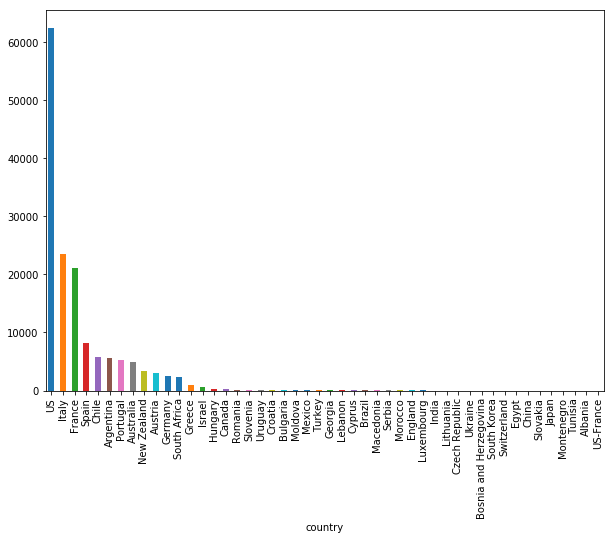

# Dealing with datetime in Pandas
Pandas built off the datetime package in Python to offer a datetime index, and plenty of ways to work with this.
However, it is still far from intuitive. 
That doesn't mean it's not useful, and for anyone doing a timeseries project, you'll need to deal with dates and times in pandas often.

Let's load a sample dataset of datetime energy data and get started!

In [26]:
energy = pd.read_csv('data/energy/PJM_Load_hourly.csv', parse_dates=True, index_col=0)

Note that this data has a DateTimeIndex. 
setting `parse_dates=True` when we read the CSV lets pandas infer this datetimeindex.

In [27]:
energy.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2001-01-01 15:00:00', '2001-01-01 16:00:00',
               '2001-01-01 17:00:00', '2001-01-01 18:00:00',
               '2001-01-01 19:00:00', '2001-01-01 20:00:00',
               '2001-01-01 21:00:00', '2001-01-01 22:00:00',
               '2001-01-01 23:00:00', '2001-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=32896, freq=None)

We can select data points within a specific time range, using the DateTimeIndex and .loc.
Here, we select the first one day of data.

In [28]:
energy.loc['1998-12-31 01:00:00':'1999-01-01 00:00:00', :]

,PJM_Load_MW
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0
1998-12-31 06:00:00,29382.0
1998-12-31 07:00:00,31373.0
1998-12-31 08:00:00,33272.0
1998-12-31 09:00:00,34133.0


In [29]:
# One record for each hour of this day.
energy.loc['1998-12-31 01:00:00':'1999-01-01 00:00:00', :].shape[0]

24

## Selecting with boolean indexing on pandas datetimeindex
We can use .dot notation with conditionals to select on specific parts of the datetime, like days or months.

In [30]:
# making a new DF that only includes the month of septmeber from each year.
septembers = energy[energy.index.month == 9]

We can also call just a date, and get all the hours/time periods in that day:

In [31]:
energy['2000-01-03']

,PJM_Load_MW
Datetime,
2000-01-03 01:00:00,21557.0
2000-01-03 02:00:00,20464.0
2000-01-03 03:00:00,20057.0
2000-01-03 04:00:00,19988.0
2000-01-03 05:00:00,20463.0
2000-01-03 06:00:00,22228.0
2000-01-03 07:00:00,25780.0
2000-01-03 08:00:00,28369.0
2000-01-03 09:00:00,29126.0


Same with for a year and month:

In [32]:
energy['2000-01'].shape

(744, 1)

In [33]:
# We see that it includes one record for each our of each day of the month of January, which has 31 days
31*24

744

In [48]:
# or better, with an assert statement:
month_jan = energy['2000-01']
assert month_jan.shape[0] == 31*24

## Resampling
We can also combine the data in different ways, and over different time periods.
This means that just because our data is in hourly time periods, we dont have to keep it that way. 

In [34]:
# We can get the average load over a day:
daily_avg_energy = energy.resample('D').mean()
daily_avg_energy.head()

,PJM_Load_MW
Datetime,
1998-04-01,27813.739130
1998-04-02,26605.791667
1998-04-03,25672.333333
1998-04-04,24487.083333
1998-04-05,23487.565217


In [35]:
# We can also get the total MWh used in a day:
daily_energy = energy.resample('D').sum()
daily_energy.columns = ["PJM_Load_MWh"]
daily_energy.head()

,PJM_Load_MWh
Datetime,
1998-04-01,639716.0
1998-04-02,638539.0
1998-04-03,616136.0
1998-04-04,587690.0
1998-04-05,540214.0


## Groupby with DateTimeIndex
Using groupby with a pandas DateTimeIndex can be extremely useful and powerful.
Let's look at how this can work.

In [36]:
index_level_names = ['year', 'month', 'week', 'day']
indexes = [energy.index.year,
           energy.index.month,
           energy.index.week,
           energy.index.day]

aggregated = energy.groupby(indexes).sum()

In [37]:
aggregated.head()

PJM_Load_MW
Datetime Datetime Datetime Datetime             
1998     4        14       1            639716.0
                           2            638539.0
                           3            616136.0
                           4            587690.0
                           5            540214.0

The index level names are not particularly helpful here. We can change them.

In [38]:
# the long, ugly way
aggregated.index.set_names('year', level=0, inplace=True)
aggregated.index.set_names('month', level=1, inplace=True)
aggregated.index.set_names('week', level=2, inplace=True)
aggregated.index.set_names('day', level=3, inplace=True)

In [39]:
# the short, clean way. Both do the same thing.
for i, index_level in enumerate(index_level_names):
            aggregated.index.set_names(index_level, level=i, inplace=True)

In [40]:
aggregated.head()

PJM_Load_MW
year month week day             
1998 4     14   1       639716.0
                2       638539.0
                3       616136.0
                4       587690.0
                5       540214.0

### Selecting on Multi-Index: Using Slice

In [41]:
energy_2000 = aggregated.loc[(slice(2000,2000), slice(None), slice(None), slice(None)), :]
energy_2000

PJM_Load_MW
year month week day             
2000 1     1    3       656411.0
                4       679531.0
                5       735085.0
                6       770492.0
                7       742633.0
                8       687443.0
                9       639502.0
           2    10      720115.0
                11      726979.0
                12      738382.0
                13      761996.0
                14      849317.0
                15      771195.0
                16      686555.0
           3    17      870363.0
                18      923068.0
                19      862246.0
                20      837918.0
                21      894751.0
                22      849900.0
                23      786532.0
           4    24      810824.0
                25      832855.0
                26      825895.0
                27      890353.0
                28      902885.0
                29      797872.0
                30      779430.0
           5    31      807775.0
           52   1       629453.0
...                          ...
     12    48   2       721921.0
                3       737315.0
           49   4       808052.0
                5       795625.0
                6       822509.0
                7       819908.0
                8       799906.0
                9       733578.0
                10      725652.0
           50   11      778092.0
                12      773580.0
                13      835876.0
                14      808279.0
                15      788230.0
                16      739383.0
                17      667204.0
           51   18      823409.0
                19      840330.0
                20      854956.0
                21      864708.0
                22      831316.0
                23      830087.0
                24      755419.0
           52   25      764130.0
                26      834687.0
                27      841897.0
                28      843363.0
                29      840427.0
                30      780665.0
                31      755509.0

[366 rows x 1 columns]

Or, say we want to know what Christmas week looked like across all the years for which we have data..

In [42]:
energy_christmas = aggregated.loc[(slice(None), slice(None), slice(52,52), slice(None)), :]

You can also then use a groupby again!

Note that here, we're using a groupby on the index level.

In [43]:
energy_christmas.groupby(level=0).sum()

,PJM_Load_MW
year,
1998,4969134.0
1999,3692395.0
2000,6884104.0
2001,5095118.0


Now, we can plot by these levels!

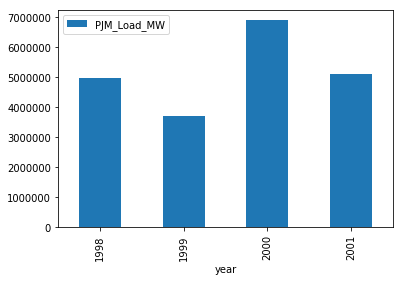

In [44]:
energy_christmas.groupby(level=0).sum().plot(kind='bar')
plt.show()

**Question:** See what just writing "52" in the slice box does.

**Question**: Select Christmas week, but only for years 1998-2000.

## Exercise:
- Find the week (and its associated year) with the highest total weekly consumption.

- Find the day of the week that averages the highest consumption

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?
    

- Is average consumption rising, falling, or staying the same over the years?
- What is the %age difference in consumption on average between April and June?